# Tracking Bastardos

### MSP, 5.14.2017

A start at looking at pitching stats over time for usable players we'd otherwise be overlooking.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# basic imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl


%matplotlib inline

In [3]:
# read in fangraphs-ripped stats. specifications:
#    fangraphs-denoted starter

# "Name","Team","W","L","ERA","G","GS","CG","ShO","SV","HLD","BS","IP","TBF","H","R","ER","HR","BB","IBB","HBP","WP","BK","SO","playerid"

def read_individual_standard_stats(infile):
    return np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","W","L","ERA","G","GS","CG","ShO",\
                                   "SV","HLD","BS","IP","TBF","H","R","ER","HR","BB",\
                                   "IBB","HBP","WP","BK","SO","playerid"),\
                         'formats': ('S20','S20','f4','f4','f4','f4','f4','f4','f4',\
                                    'i2','i2','i2','f4','i2','i2','i2','i2','i2','f4',\
                                    'f4','f4','f4','f4','f4','i4')},\
                 skip_header=1,delimiter=',')


Pitchers2017a = read_individual_standard_stats('2017Pitching/Relievers2017_05_14.csv')
Pitchers2017b = read_individual_standard_stats('2017Pitching/Relievers2017_06_01.csv')

# (5.14: min 20 inn.)


I'm curious about the number of innings per outing vs number of innings.


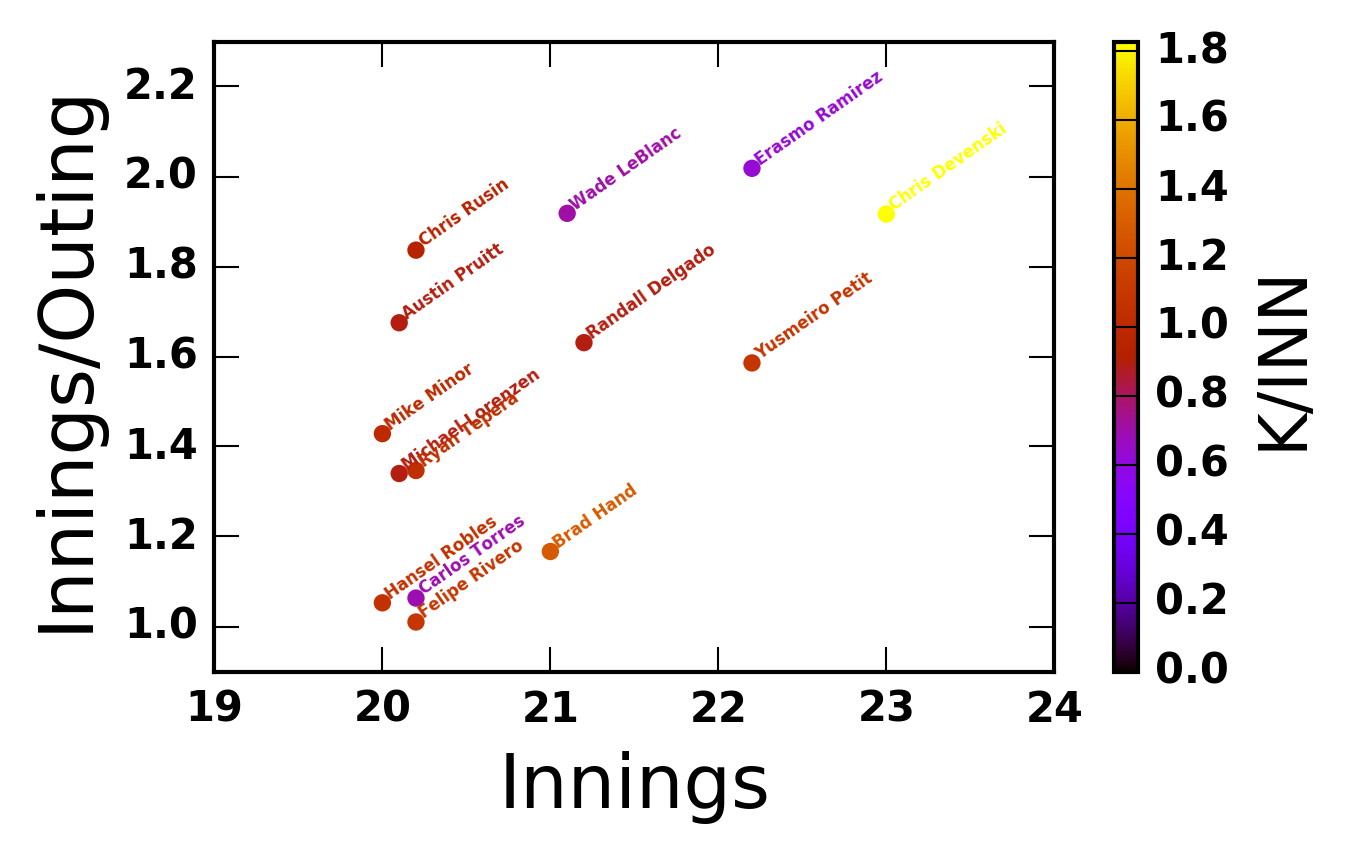

In [4]:
fig = plt.figure(figsize=(4,3))

ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

kinn = Pitchers2017a['SO']/Pitchers2017a['IP']
clrs= kinn/np.max(kinn)

ax.scatter(Pitchers2017a['IP'],Pitchers2017a['IP']/Pitchers2017a['G'],color=cm.gnuplot(clrs,1.),s=10.)
ax.set_xlabel('Innings',size=18)
ax.set_ylabel('Innings/Outing',size=18)



cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0., vmax=np.max(kinn))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('K/INN',size=16)
#cb1.set_ticks([90,93,96,99])


# check out just the reliever corner
ax.axis([19,24,0.9,2.3])



for indx in range(0,len(Pitchers2017a['Name'])):
    if (Pitchers2017a['IP'][indx] <= 24) & ((Pitchers2017a['IP']/Pitchers2017a['G'])[indx] < 2.2):
        ax.text(Pitchers2017a['IP'][indx],(Pitchers2017a['IP']/Pitchers2017a['G'])[indx],Pitchers2017a['Name'][indx],size=4,rotation=35.,ha='left',va='bottom',color=cm.gnuplot(clrs[indx],1.))





Check out those Bastardos! Get 'em while they're hot!

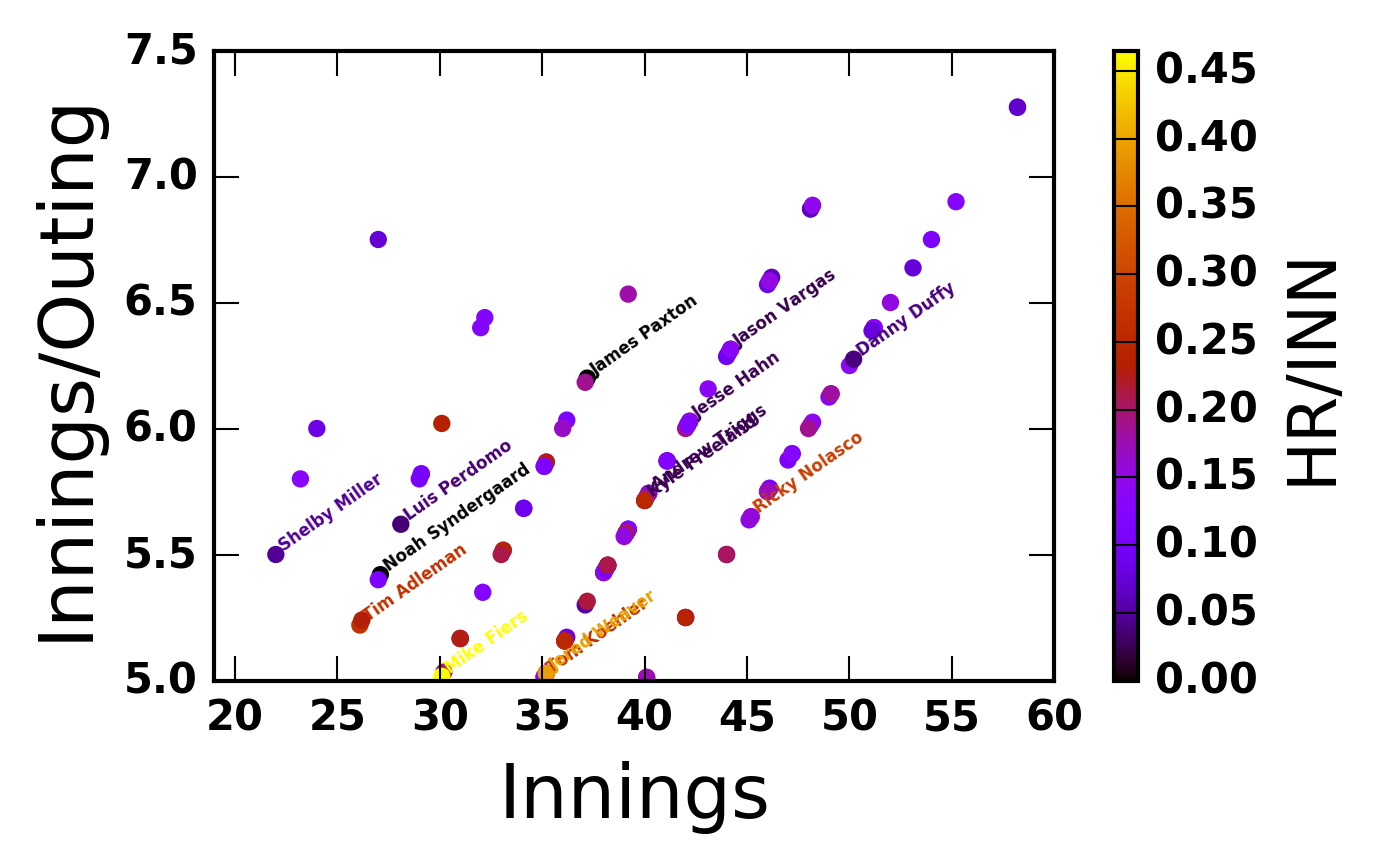

In [5]:
fig = plt.figure(figsize=(4,3))

ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

hrinn = Pitchers2017a['HR']/Pitchers2017a['IP']
clrs= hrinn/np.max(hrinn)

ax.scatter(Pitchers2017a['IP'],Pitchers2017a['IP']/Pitchers2017a['G'],color=cm.gnuplot(clrs,1.),s=10.)
ax.set_xlabel('Innings',size=18)
ax.set_ylabel('Innings/Outing',size=18)



cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0., vmax=np.max(hrinn))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('HR/INN',size=16)
#cb1.set_ticks([90,93,96,99])


# check out just the reliever corner
ax.axis([19,60,5.0,7.5])

for indx in range(0,len(Pitchers2017a['Name'])):
    if (Pitchers2017a['IP'][indx] <= 60) & ((Pitchers2017a['IP']/Pitchers2017a['G'])[indx] > 5.0):
        if (hrinn[indx] <= .05) | (hrinn[indx] > 0.25):
            ax.text(Pitchers2017a['IP'][indx],(Pitchers2017a['IP']/Pitchers2017a['G'])[indx],Pitchers2017a['Name'][indx],size=4,rotation=35.,ha='left',va='bottom',color=cm.gnuplot(clrs[indx],1.))






Due to discreteness this early in the season you can see the lines where players have the same inning totals. That will get ironed out over time.

Couple notes:
1. HR/INN > 0.25 is very bad, and hard for a starter to maintain. Somewhat shocking that **Ricky Nolasco, Time Adleman, Jered Weaver, Tom Koehler**, and **Mike Fiers** (in particular) are able to keep their jobs.
2. Conversely, HR/INN < 0.05 is very good, and is definitely driving the success of **James Paxton, Noah Syndergaard,** (RIP both) **Jason Vargas, Danny Duffy, Jesse Hahn, Luis Perdomo, Shelby Miller**(!!!)**, Andrew Triggs, Kyle Freeland**.

# Update 06.01.2017


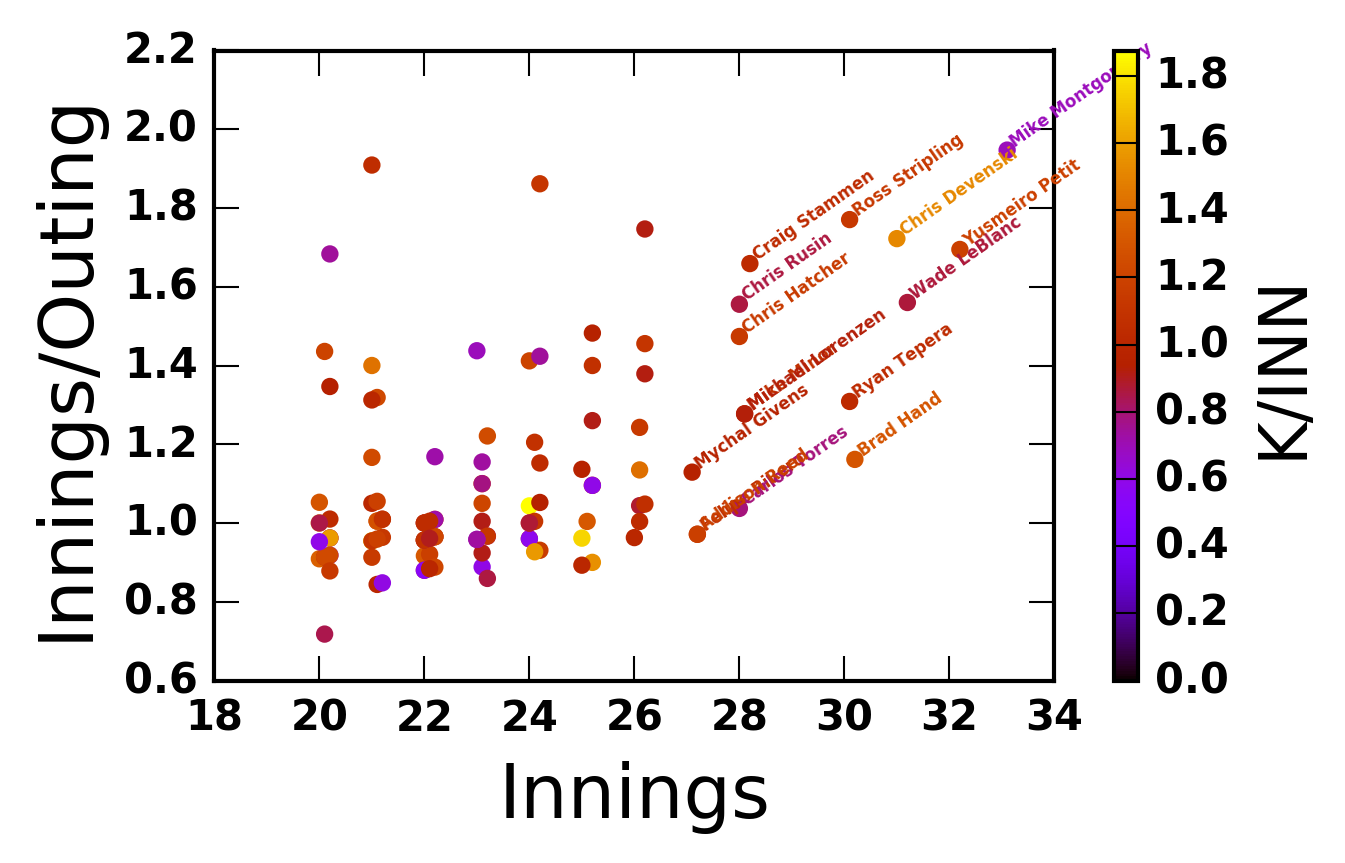

In [6]:
fig = plt.figure(figsize=(4,3))

ax = fig.add_axes([0.15,0.15,0.7,0.7])
ax2 = fig.add_axes([0.9,0.15,0.02,0.7])

kinn = Pitchers2017b['SO']/Pitchers2017b['IP']
clrs= kinn/np.max(kinn)

ax.scatter(Pitchers2017b['IP'],Pitchers2017b['IP']/Pitchers2017b['G'],color=cm.gnuplot(clrs,1.),s=10.)
ax.set_xlabel('Innings',size=18)
ax.set_ylabel('Innings/Outing',size=18)



cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0., vmax=np.max(kinn))
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('K/INN',size=16)
#cb1.set_ticks([90,93,96,99])


# check out just the reliever corner
#ax.axis([19,24,0.9,2.3])



for indx in range(0,len(Pitchers2017b['Name'])):
    if (Pitchers2017b['IP'][indx] >= 27) & ((Pitchers2017b['IP']/Pitchers2017b['G'])[indx] > 0.0):
        ax.text(Pitchers2017b['IP'][indx],(Pitchers2017b['IP']/Pitchers2017b['G'])[indx],Pitchers2017b['Name'][indx],size=4,rotation=35.,ha='left',va='bottom',color=cm.gnuplot(clrs[indx],1.))




